In [29]:
import mdi.globals as gl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import pandas as pd

plt.style.use('default')

In [30]:
# load data
data = pd.read_csv("/cifs/diedrichsen/data/ModifiedDigitInterference/behavioural/MDI0_merged.csv")
data = data[(data.correct==1) & (data.BN>1)]
data[['ipi1', 'ipi2', 'ipi3', 'ipi4']] = data[['ipi1', 'ipi2', 'ipi3', 'ipi4']].astype(float)
data.PosInQuartet = pd.Categorical(data.PosInQuartet, categories=[1, 2, 3, 4], ordered=True)
data.Quartet = pd.Categorical(data.Quartet, categories=['AAAA', 'AAMA', 'AARA'], ordered=True)

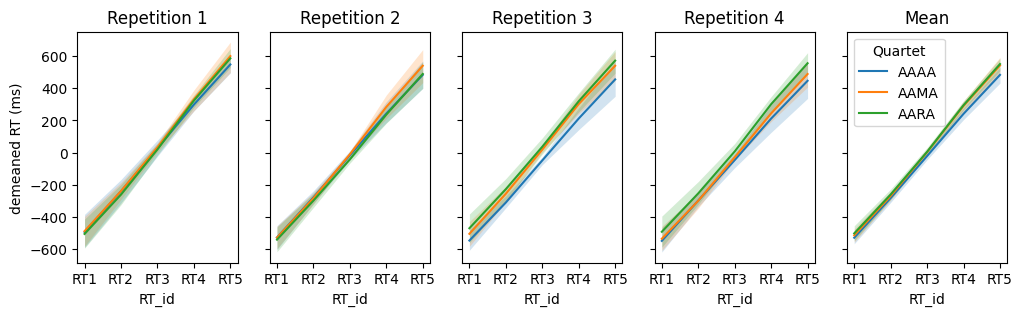

In [31]:
# melt dataframe RTs
melted_rt = data.melt(id_vars=["Quartet", 'SID', 'PosInQuartet', 'TN', 'BN'],value_vars=["reactionTime1","reactionTime2","reactionTime3","reactionTime4", "reactionTime5"], value_name="RT", var_name="RT_id")
melted_rt['RT'] = (melted_rt['RT']- melted_rt.groupby('SID')['RT'].transform('mean'))
melted_rtG = melted_rt.groupby(['SID', 'Quartet', 'PosInQuartet', 'RT_id'], observed=True).mean(numeric_only=True).reset_index()
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(12, 3))

for i in range(4):
    ax = axs[i]
    sb.lineplot(ax=ax, data=melted_rtG[melted_rtG.PosInQuartet == i+1], x="RT_id",y="RT",hue="Quartet", err_kws={'linewidth':0}, legend=False)
    ax.set_xticks(np.arange(0, 5, 1))
    ax.set_xticklabels(['RT1', 'RT2', 'RT3', 'RT4', 'RT5'])
    ax.set_title(f'Repetition {i+1}')
sb.lineplot(ax=axs[-1], data=melted_rtG, x="RT_id", y="RT",hue="Quartet", err_kws={'linewidth':0})
axs[-1].set_xticks(np.arange(0, 5, 1))
axs[-1].set_xticklabels(ax.get_xticklabels())
axs[-1].set_title('Mean')
axs[0].set_ylabel('demeaned RT (ms)')
plt.show()

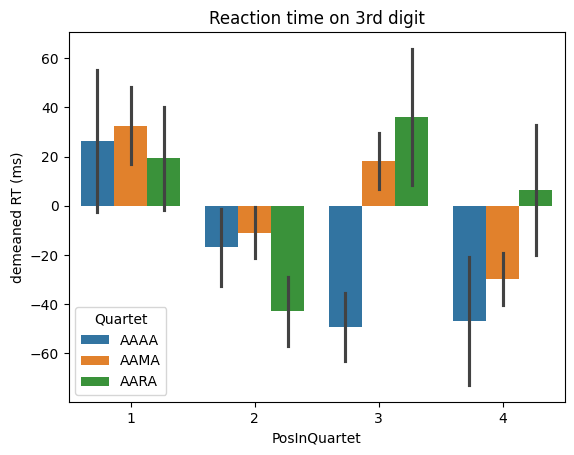

In [32]:
fig, ax = plt.subplots()

sb.barplot(ax=ax, data=melted_rtG[melted_rtG['RT_id']=='reactionTime3'], x='PosInQuartet', y='RT', hue='Quartet', errorbar='se')
ax.set_title('Reaction time on 3rd digit')
ax.set_ylabel('demeaned RT (ms)')

plt.show()

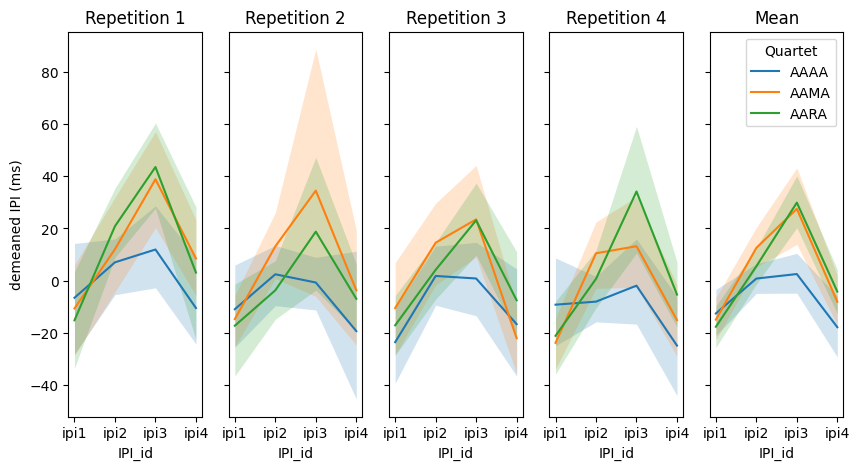

In [17]:
# melt dataframe ipis
melted_ipi = data.melt(id_vars=["Quartet", 'SID', 'PosInQuartet', 'TN', 'BN'],value_vars=["ipi1","ipi2","ipi3","ipi4"], value_name="IPI", var_name="IPI_id")
melted_ipi['IPI'] = (melted_ipi['IPI']- melted_ipi.groupby('SID')['IPI'].transform('mean'))
melted_ipiG = melted_ipi.groupby(['SID', 'Quartet', 'PosInQuartet', 'IPI_id'], observed=True).mean(numeric_only=True).reset_index()

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(10, 5))

for i in range(4):
    ax = axs[i]
    sb.lineplot(ax=ax, data=melted_ipiG[melted_ipiG.PosInQuartet == i+1], x="IPI_id",y="IPI",hue="Quartet", err_kws={'linewidth':0}, legend=False)
    ax.set_title(f'Repetition {i+1}')
sb.lineplot(ax=axs[-1], data=melted_ipiG, x="IPI_id", y="IPI",hue="Quartet", err_kws={'linewidth':0})
axs[-1].set_title('Mean')
axs[0].set_ylabel('demeaned IPI (ms)')
plt.show()